In [1]:
#%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#For interactive plots
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [2]:
livestock = pd.read_csv('data/Production_Livestock_E_All_Data_(Normalized).csv', parse_dates=[7], index_col=7,  encoding='iso-8859-1')
beehives = livestock.loc[livestock['Item'] == 'Beehives', ['Area', 'Value']]
beehives.columns = ['Country', 'Value']
beehives.head()

,Country,Value
Year,,
1961-01-01,Albania,95100.0
1962-01-01,Albania,92800.0
1963-01-01,Albania,83500.0
1964-01-01,Albania,96500.0
1965-01-01,Albania,109800.0


In [4]:
def percentage_change(df, countries, startYear, endYear):
    df = df.loc[df.Country.isin(countries)]
    
    old = np.array(df.loc[df.index == startYear, 'Value'])
    new = np.array(df.loc[df.index == endYear, 'Value'])
    res = pd.DataFrame((new - old) / old) * 100
    res.index = df.Country.unique()
    res.columns = ['Value']
    
    fig = plt.figure(figsize=(15, 8))
    plt.bar(x = res.index, height = res.Value, color=(res['Value'] > 0).map({True: 'b', False: 'r'}))
    plt.axhline(y = 0,linewidth = 1, color = 'k');

In [5]:
continents = ['Africa','Americas', 'Asia',  'Europe', 'Oceania']
countries = ['Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia','Australia', 'Austria', 'Azerbaijan', 'Belarus', 'Belgium','Belgium-Luxembourg', 'Belize', 'Bolivia (Plurinational State of)','Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Burundi','Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile','China', 'Colombia', 'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba','Cyprus', 'Czechia', 'Czechoslovakia', 'Dominican Republic','Ecuador', 'Egypt', 'El Salvador', 'Estonia', 'Ethiopia','Ethiopia PDR', 'Fiji', 'Finland', 'France', 'French Polynesia','Georgia', 'Germany', 'Greece', 'Greenland', 'Guadeloupe', 'Guam','Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti','Honduras', 'Hungary', 'India', 'Iran (Islamic Republic of)','Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kenya','Kyrgyzstan', 'Latvia', 'Lebanon', 'Libya', 'Liechtenstein','Lithuania', 'Luxembourg', 'Madagascar', 'Mali', 'Martinique','Mexico', 'Mongolia', 'Montenegro', 'Morocco', 'Mozambique','Myanmar', 'Netherlands', 'New Caledonia', 'New Zealand','Nigeria', 'Niue', 'Occupied Palestinian Territory', 'Oman','Pakistan', 'Paraguay', 'Poland', 'Portugal', 'Puerto Rico','Republic of Korea', 'Republic of Moldova', 'Romania','Russian Federation', 'Rwanda', 'Samoa', 'Senegal', 'Serbia','Serbia and Montenegro', 'Slovakia', 'Slovenia', 'South Africa','Spain', 'Sudan', 'Sudan (former)', 'Sweden', 'Switzerland','Syrian Arab Republic', 'Tajikistan','The former Yugoslav Republic of Macedonia', 'Timor-Leste','Tonga', 'Trinidad and Tobago', 'Tunisia', 'Turkey', 'Tuvalu','Uganda', 'Ukraine', 'United Kingdom','United Republic of Tanzania', 'United States of America','Uruguay', 'USSR', 'Uzbekistan','Venezuela (Bolivarian Republic of)', 'Viet Nam','Wallis and Futuna Islands', 'Yemen', 'Yugoslav SFR', 'Zambia']
selected_countries = ['Austria', 'Bulgaria', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Italy', 'Poland', 'Portugal', 'Spain', 'Sweden', 'Switzerland', 'Canada', 'Mexico', 'United States of America']

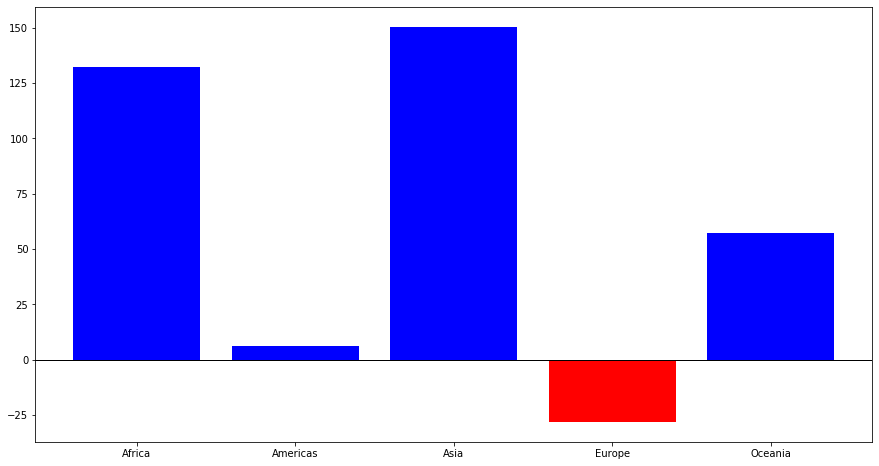

In [6]:
percentage_change(beehives, continents, '1961', '2000')

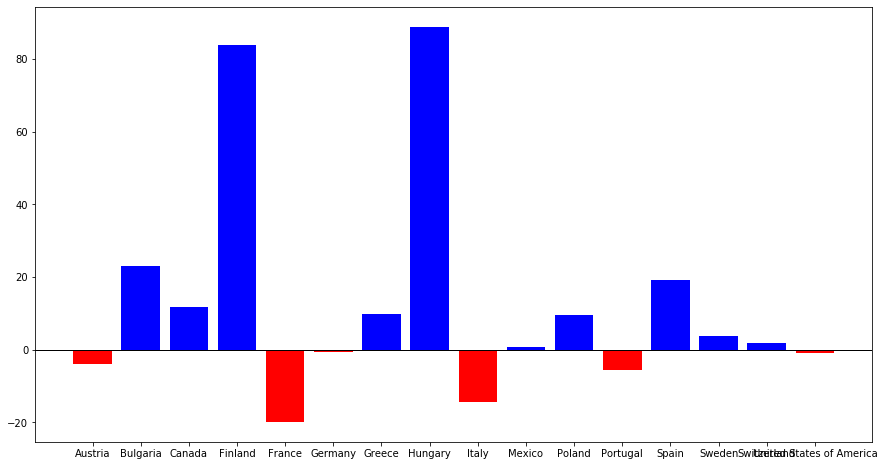

In [7]:
percentage_change(beehives, selected_countries, '2010', '2017')

# An interactive plot of percentage changes during the years

In [44]:
beehives_selected = beehives.loc[beehives.Country.isin(selected_countries)]

@interact(Starting_Year=(1961, 2016, 1), End_Year=(1962, 2017, 1))
def show_beehives_for_country(Starting_Year=1961, End_Year=2017):
    
    old = np.array(beehives_selected.loc[beehives_selected.index == str(Starting_Year), 'Value'])
    new = np.array(beehives_selected.loc[beehives_selected.index == str(End_Year), 'Value'])
    
    res = pd.DataFrame((new - old) / old) * 100
    res.index = beehives_selected.Country.unique()
    res.columns = ['Value']
    
    fig = plt.figure(figsize=(15, 8))
    plt.axis([0, len(selected_countries), -150, 500])
    plt.bar(x = res.index, height = res.Value, color=(res['Value'] > 0).map({True: 'b', False: 'r'}))
    plt.xticks(rotation=45)
    plt.axhline(y = 0,linewidth = 1, color = 'k');

interactive(children=(IntSlider(value=1961, description='Starting_Year', max=2016, min=1961), IntSlider(value=…

Here we have a plot of percentage changes for some selected countries during the years. You can use the sliders to change years between which the percentage change is computed.

In [ ]:
# beehives_selected = beehives.loc[beehives.Area.isin(selected_countries)]

# @interact(Starting_Year=(1961, 2016, 1), End_Year=(1962, 2017, 1))
# def show_beehives_for_country(Starting_Year=1961, End_Year=2017):
    
#     old = np.array(beehives_selected.loc[beehives_selected.Year == Starting_Year, 'Value'])
#     new = np.array(beehives_selected.loc[beehives_selected.Year == End_Year, 'Value'])
    
#     res = pd.DataFrame((new - old) / old) * 100
#     res.index = beehives_selected.Area.unique()
#     res.columns = ['Value']
    
#     fig = plt.figure(figsize=(15, 8))
#     plt.axis([0, len(selected_countries), -150, 500])
#     plt.bar(x = res.index, height = res.Value, color=(res['Value'] > 0).map({True: 'b', False: 'r'}))
#     plt.xticks(rotation=45)
#     plt.axhline(y = 0,linewidth = 1, color = 'k');